# Model Training

## Import Data and required libraries

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor 

### Importing data

In [2]:
df = pd.read_csv('./data/StudentsPerformance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Handling Categorical Vlaues

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Seperating categorical and numerical values

In [4]:
X = df.drop(columns=['math_score'])
y = df['math_score']

In [5]:
cat_columns = X.select_dtypes(include='object').columns
num_columns = X.select_dtypes(exclude='object').columns

print(cat_columns)
print(num_columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')
Index(['reading_score', 'writing_score'], dtype='object')


### Transforming categorical values into numerical values and standardizing numerical values

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('one_hot_encoder', ohe, cat_columns),
    ('standard_scaler', scaler, num_columns)
], verbose_feature_names_out=False).set_output(transform="pandas")

In [7]:
X_transformed = preprocessor.fit_transform(X)
X_transformed.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,reading_score,writing_score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333


## Model Training

### Split data into train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Model Evaluation

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = list(models.keys())
r2_list = []

for m in model_list:
    model = models[m]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    r2_list.append(model_test_r2)

    print(f'Model: {m}')

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("-"*30)

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print("="*30)

    print("\n")

Model: Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3321
- Mean Absolute Error: 4.2710
- R2 Score: 0.8739
------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4360
- Mean Absolute Error: 4.2287
- R2 Score: 0.8786


Model: Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Model: Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Model: K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7079
- Mean Absolute Error: 4.5168
- R2 Score: 0.8555
-------

In [12]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=["R2 Score"], ascending=False).reset_index(drop=True)

,Model Name,R2 Score
0,Ridge,0.880593
1,Linear Regression,0.878565
2,Random Forest Regressor,0.854285
3,CatBoosting Regressor,0.851632
4,AdaBoost Regressor,0.846895
5,XGBRegressor,0.827797
6,Lasso,0.825320
7,K-Neighbors Regressor,0.783813
8,Decision Tree,0.734649


Best Model: **Ridge**

In [13]:
model = Ridge(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_pred)

model_test_r2

0.8805931485028741

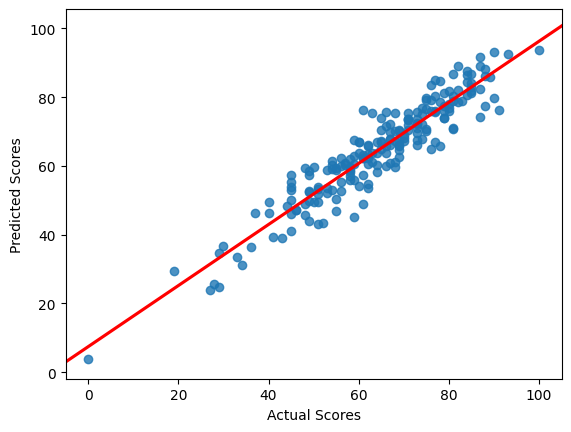

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=y_test, y=y_pred, ci=None, truncate=False, line_kws={'color': 'red'})
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.show()